In [1]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
import PyKDL as kdl
import kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [2]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 

def M_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)


def M_u2c_func():   
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    M_u2c(q_none)
    
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    H = pb.calculateMassMatrix(pbmodel, q_none)
    
    
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)


In [11]:
#pbmodel = pb.loadURDF("pantilt.urdf")
sim = pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
ndofs = 60
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)

#storage for timing data
mediantime_kdl = [None]*ndofs
mediantime_u2c = [None]*ndofs
mediantime_rbdl = [None]*ndofs
mediantime_pb = [None]*ndofs
mintime_kdl = [None]*ndofs
mintime_u2c = [None]*ndofs
mintime_rbdl = [None]*ndofs
mintime_pb = [None]*ndofs
averagetime_kdl = [None]*ndofs
averagetime_u2c = [None]*ndofs
averagetime_rbdl = [None]*ndofs
averagetime_pb = [None]*ndofs

nitr = 1
nrepeat = 10
    
for i in range(ndofs):    
    print i
    path_to_urdf = "/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/" + str(urdf_nr[i]) + "dof.urdf"
    #path_to_urdf = str(urdf_nr[i]) + "dof.urdf"
    end_link = "link" + str(urdf_nr[i])
    root = 'base_link'
    tip = end_link
    
    ok, kdl_tree = kdlurdf.treeFromFile(path_to_urdf)
    kdlmodel = kdl_tree.getChain(root,tip)
    
    rbdlmodel = rbdl.loadModel(path_to_urdf)
    pbmodel = pb.loadURDF(path_to_urdf)
    asd = u2c.URDFparser()
    asd.from_file(path_to_urdf)
    
    jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
    njoints = len(jlist)

    g_kdl = kdl.Vector()
    M_kdl = kdl.JntSpaceInertiaMatrix(njoints)
    M_rbdl = (rbdlmodel.q_size, rbdlmodel.q_size)
    M_rbdl = np.zeros(M_rbdl)
    
    q_kdl = kdl.JntArray(njoints)
    q_np = np.zeros(njoints)
    q_none = [None]*njoints

    
    M_u2c = asd.get_inertia_matrix_crba(root, tip)
    timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)
    mintime_u2c[i] = min(timeit_u2c)/nitr*1000000
    mediantime_u2c[i] = median(timeit_u2c)/nitr*1000000
    averagetime_u2c[i] = average(timeit_u2c)/nitr*1000000
    
   # timeit_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
   # mintime_pb[i] = min(timeit_pb)/nitr*1000000
   # mediantime_pb[i] = median(timeit_pb)/nitr*1000000
   # averagetime_pb[i] = average(timeit_pb)/nitr*1000000
    
   # timeit_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
   # mintime_rbdl[i] = min(timeit_rbdl)/nitr*1000000
   # mediantime_rbdl[i] = median(timeit_rbdl)/nitr*1000000
   # averagetime_rbdl[i] = average(timeit_rbdl)/nitr*1000000

   # timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
   # mintime_kdl[i] = min(timeit_kdl)/nitr*1000000
   # mediantime_kdl[i] = median(timeit_kdl)/nitr*1000000
   # averagetime_kdl[i] = average(timeit_kdl)/nitr*1000000


0
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/1dof.urdf
1
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/2dof.urdf
2
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/3dof.urdf
3
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/4dof.urdf
4
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjo

34
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/35dof.urdf
35
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/36dof.urdf
36
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/37dof.urdf
37
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/38dof.urdf
38
T

In [12]:
print "mediantime_u2c = ",mintime_u2c



mediantime_u2c =  [19.073486328125, 23.84185791015625, 20.02716064453125, 17.881393432617188, 17.881393432617188, 19.073486328125, 20.9808349609375, 24.080276489257812, 25.033950805664062, 25.987625122070312, 28.133392333984375, 27.894973754882812, 29.802322387695312, 30.994415283203125, 31.948089599609375, 32.901763916015625, 33.855438232421875, 36.00120544433594, 37.90855407714844, 37.90855407714844, 40.0543212890625, 41.961669921875, 41.961669921875, 44.10743713378906, 43.8690185546875, 46.96846008300781, 46.01478576660156, 51.021575927734375, 51.021575927734375, 52.928924560546875, 51.975250244140625, 55.07469177246094, 56.02836608886719, 56.02836608886719, 60.08148193359375, 59.1278076171875, 60.08148193359375, 65.80352783203125, 63.18092346191406, 66.04194641113281, 65.80352783203125, 67.94929504394531, 69.85664367675781, 72.95608520507812, 69.85664367675781, 75.81710815429688, 72.00241088867188, 76.05552673339844, 76.05552673339844, 78.91654968261719, 77.96287536621094, 81.77757

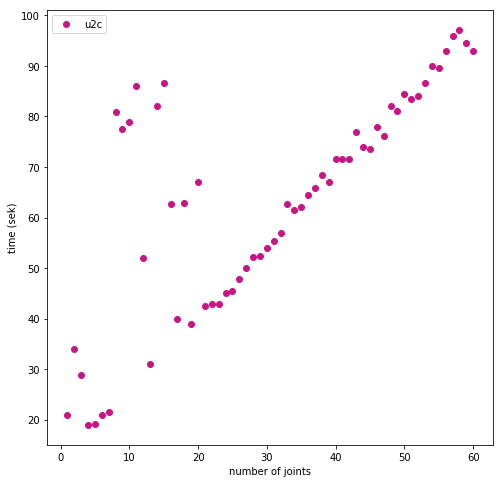

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (8, 8))
#plt.scatter(joint_nr, mediantime_kdl, c='lightseagreen', label='kdl')
#plt.scatter(joint_nr, mediantime_u2c, c='hotpink', label='u2c')
plt.scatter(joint_nr, mediantime_u2c, c='mediumvioletred', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='dodgerblue', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='coral', label='pybullet')
plt.xlabel("number of joints")
plt.ylabel("time (sek)")
plt.legend(loc='upper left')
med_fig.show()


In [10]:
mediantime_u2c =  [11.71112060546875, 12.900829315185547, 13.22031021118164, 14.240741729736328, 15.19918441772461, 15.80953598022461, 17.17090606689453, 18.9208984375, 19.11163330078125, 21.119117736816406, 21.049976348876953, 23.968219757080078, 23.720264434814453, 27.148723602294922, 25.16031265258789, 29.740333557128906, 27.530193328857422, 32.351016998291016, 30.16948699951172, 35.26926040649414, 33.12110900878906, 38.950443267822266, 34.65890884399414, 36.34929656982422, 38.02061080932617, 39.229393005371094, 39.708614349365234, 41.52059555053711, 42.400360107421875, 43.430328369140625, 44.75831985473633, 46.56076431274414, 47.190189361572266, 48.93064498901367, 50.15134811401367, 55.429935455322266, 52.40917205810547, 58.400630950927734, 55.4203987121582, 61.88869476318359, 58.040618896484375, 64.79024887084961, 60.83965301513672, 66.69044494628906, 65.27185440063477, 70.25003433227539, 67.55828857421875, 73.43053817749023, 72.00002670288086, 75.77180862426758, 72.43871688842773, 77.8508186340332, 75.8814811706543, 81.91823959350586, 78.58037948608398, 85.29186248779297, 84.10930633544922, 89.33782577514648, 85.88075637817383, 85.14881134033203]
mediantime_kdl =  [3.7598609924316406, 5.660057067871094, 7.52568244934082, 8.740425109863281, 11.289119720458984, 12.55035400390625, 13.728141784667969, 15.025138854980469, 18.210411071777344, 20.13564109802246, 21.409988403320312, 22.93109893798828, 23.870468139648438, 25.799274444580078, 27.085542678833008, 25.129318237304688, 29.768943786621094, 31.45933151245117, 32.56082534790039, 34.050941467285156, 34.815073013305664, 35.88557243347168, 38.71560096740723, 40.79937934875488, 42.10472106933594, 41.43953323364258, 43.43986511230469, 44.7392463684082, 46.42963409423828, 48.06995391845703, 49.15475845336914, 51.03468894958496, 58.06922912597656, 58.441162109375, 61.889886856079094, 62.069892883300774, 64.81051445007324, 65.74392318725586, 66.75004959106445, 69.78034973144531, 69.94962692260742, 72.00479507446289, 73.78101348876953, 75.93035697937012, 76.81012153625488, 80.22427558898926, 80.1396369934082, 82.40938186645508, 83.86492729187012, 85.42537689208984, 88.87529373168945, 90.53468704223633, 92.30375289916992, 92.35501289367676, 95.46041488647461, 96.46058082580566, 98.85072708129883, 102.41508483886719, 102.89430618286133, 103.7454605102539]
mediantime_rbdl =  [1.7786026000976562, 2.460479736328125, 3.3807754516601562, 3.9386749267578125, 4.730224609375, 5.509853363037109, 6.279945373535156, 7.169246673583984, 8.001327514648438, 8.838176727294922, 9.739398956298828, 10.671615600585938, 11.699199676513672, 12.481212615966797, 13.430118560791016, 14.710426330566406, 15.687942504882812, 16.56055450439453, 17.53091812133789, 18.59903335571289, 19.750595092773438, 20.580291748046875, 21.93927764892578, 23.349523544311523, 25.415420532226562, 25.04110336303711, 26.434659957885742, 27.32992172241211, 28.960704803466797, 30.00020980834961, 31.51893615722656, 32.47976303100586, 33.75053405761719, 35.130977630615234, 36.48996353149414, 37.51516342163086, 39.2913818359375, 40.19021987915039, 41.66126251220703, 42.94872283935547, 44.44003105163574, 45.76921463012695, 47.39046096801758, 48.82097244262695, 50.339698791503906, 52.79421806335449, 53.46059799194336, 54.80527877807617, 56.75554275512695, 58.48407745361328, 60.23883819580078, 61.34986877441406, 63.33589553833007, 64.71037864685059, 66.46990776062012, 68.69077682495117, 69.6706771850586, 71.9451904296875, 73.62484931945801, 74.72038269042969]
mediantime_pb =  [2.7108192443847656, 3.6787986755371094, 4.544258117675781, 5.738735198974609, 6.527900695800781, 7.5244903564453125, 8.6212158203125, 9.940862655639648, 10.960102081298828, 12.30478286743164, 13.320446014404297, 14.74142074584961, 15.990734100341795, 17.51422882080078, 18.949508666992188, 20.890235900878906, 22.3541259765625, 23.903846740722656, 26.170015335083008, 27.489662170410156, 29.64496612548828, 30.98964691162109, 32.78493881225586, 35.250186920166016, 36.67473793029785, 38.90514373779297, 40.58122634887695, 42.78421401977539, 44.83938217163086, 46.999454498291016, 49.09992218017578, 52.36029624938965, 54.035186767578125, 57.28006362915039, 58.90965461730957, 61.26999855041504, 64.95952606201172, 66.38050079345703, 71.3646411895752, 72.91555404663086, 76.06983184814453, 78.63044738769531, 79.74386215209961, 83.30464363098145, 86.55428886413574, 95.36981582641602, 92.64945983886719, 96.67634963989258, 99.20120239257812, 99.69949722290039, 104.3844223022461, 113.25478553771973, 115.97037315368652, 120.66483497619629, 124.19939041137694, 127.22015380859375, 131.1182975769043, 137.40062713623047, 141.27016067504883, 143.55897903442383]

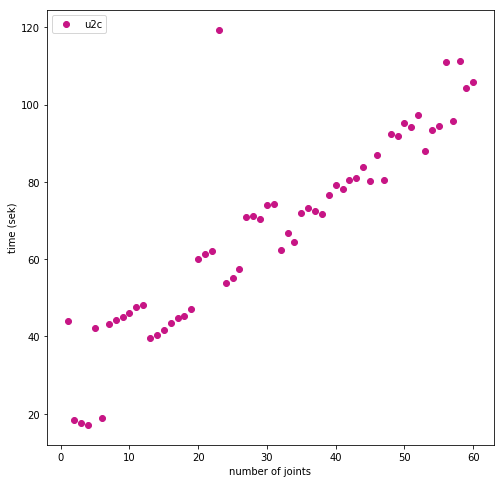

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (8, 8))
#plt.scatter(joint_nr, mediantime_kdl, c='lightseagreen', label='kdl')
#plt.scatter(joint_nr, mediantime_u2c, c='hotpink', label='u2c')
plt.scatter(joint_nr, mediantime_u2c, c='mediumvioletred', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='dodgerblue', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='coral', label='pybullet')
plt.xlabel("number of joints")
plt.ylabel("time (sek)")
plt.legend(loc='upper left')
med_fig.show()


In [ ]:
timing_scores = [mediantime_rbdl, mediantime_u2c, mediantime_kdl, mediantime_pb]
names = ["RBDL", "U2C", "KDL", "pybullet"]
boxplot = plt.figure(figsize = (7, 7))
boxplot.suptitle("Library Timing Comparison")
ax = boxplot.add_subplot(111)
ax.boxplot(timing_scores)
#plt.boxplot(timing_scores)
ax.set_xticklabels(names)


In [ ]:
av_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, averagetime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, averagetime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
av_fig.show()


In [ ]:
median_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
median_fig.show()

In [ ]:
fig = plt.figure(figsize = (10, 10))
nplots = 5
x = np.arange(3)
j = 0
for i in range(1, nplots):
    plt.subplot(2, 2, i)
    plt.bar(x, height= [mintime_rbdl[j], mintime_u2c[j], mintime_pb[j]])
    plt.xticks(x, ['rbdl','u2c', 'pybullet'])
    j += 3

plt.show()

In [ ]:
fig = plt.figure(figsize = (17, 17))
nplots = 31
j = 0
for i in range(1, nplots):
    plt.subplot(5, 6, i)
    plt.bar(x, height= [mintime_kdl[j], mintime_u2c[j]])
    plt.xticks(x, ['kdl','u2c'])
    j += 1

plt.show()